# **PROJECT: PREDICTING THE SENTIMENTS OF THE TWEETS USING MACHINE LEARNING**

Team Members:

  - Chris Portugalisa: c0890038
  - Jasser Arabe: c0885449
  - Mohit Sharma: c0888345
  - Siddharth Sawhney: c0885431
  - Smill Valdez: c0883827

**TABLE OF CONTENT**

>[Load the data](#scrollTo=tU20oOfA0fxB)

>[Exploratory Data Analysis](#scrollTo=qvh5VNwI2ah4)

>>[2.1. Visualize the Distribution of the Target Variable](#scrollTo=d3XW69Xx3DFx)

>>[2.2. Generate a Word Cloud](#scrollTo=7heUuDGO3Omy)

>>[2.3. Check for missing values](#scrollTo=64IjaIKX3dYm)

>>[2.4. Visualize Text Length Distribution](#scrollTo=BdOOsYzk3gEY)

>>[2.5. EDA Insights](#scrollTo=dyU5t3xN7vCp)

>[Data Pre-processing](#scrollTo=B-8jw4bH78U_)

>[Model Building](#scrollTo=fUG9pxICICSJ)

>>[4.1. Logistic Regression](#scrollTo=cZeb5DBNNMKM)

>>[4.2. Naive Bayes](#scrollTo=F4RdXN32NYm5)

>>[4.3. Linear Support Vector Machine](#scrollTo=YHolrJRsNcBu)

>>[4.4. Random Forest](#scrollTo=HmW8NQl0NgOU)

>>[4.5 SGDC Classifier with logistic regression setting](#scrollTo=pajlmNOCrdEn)

>>[4.6. ANN](#scrollTo=bOccLJvoeYQa)

>>[4.7. VADER Lexicon](#scrollTo=3EMdKtMxNgBw)

>[SentiWordNet](#scrollTo=jo4b2eCz9z2H)

>[Model Evaluation](#scrollTo=WphXuwSnTN5s)

>[Model Optimization](#scrollTo=7l_8awzQYHii)

>[Sentiment Predictions](#scrollTo=DxQu040NFUyd)



#1. Load the data

We will:
- Load the Dataset: We'll load the dataset into a pandas DataFrame to examine its structure.
- Identify Columns and Data Types: We'll identify the target variable and the features available for prediction.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 95% 77.0M/80.9M [00:02<00:00, 40.8MB/s]
100% 80.9M/80.9M [00:02<00:00, 30.3MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
## importing important libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('punkt')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
!pip install text_normalizer
import text_normalizer as tn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  Preparing metadata (setup.py) ... done
  Created wheel for text_normalizer: filename=text_normalizer-0.1.3-cp310-cp310-linux_x86_64.whl size=247444 sha256=77ceee3a7966ceb91ea66d4f839c44fd256f2edc6197f758ec99a295f390845d
  Stored in directory: /root/.cache/pip/wheels/fa/9f/80/4a4e7d2d6f6fc35b19993353c2c8f1f7ac48ac29c826d2e676
Successfully built text_normalizer


In [ ]:
## creating the dataframe
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = ('ISO-8859-1'), names=['label', 'tweet_id', 'timestamp', 'query', 'user_id', 'text'])

The dataset has been successfully loaded, and it consists of six columns. Based on the initial examination, here's a brief overview:

- label: Appears to be the target variable with integer values, likely indicating sentiment (e.g., 0 for negative, 1 for positive).
- tweet_id: Seems to be an ID or timestamp (also an integer).
- timestamp: Contains timestamps in a readable format.
- query: Has a constant value "NO_QUERY" in the first few rows; its purpose is unclear without further examination, but it might not be relevant for sentiment analysis.
- user_id: Likely represents usernames.
- text: Contains the text data, which is what we're most interested in for sentiment analysis.

*The data types are as follows:*

Integer for columns label and tweet_id, and object (string) for columns timestamp to user_id.
Given this structure, our target variable for sentiment analysis is in Column label, and the feature available for prediction is the text data in Column text.

#2. Exploratory Data Analysis

1. Visualize the Distribution of the Target Variable: This helps us understand how balanced or imbalanced our dataset is in terms of sentiment.
2. Explore Text Data:
- Identify common words and phrases to understand the general sentiment and topics.
- Generate word clouds or frequency distributions for a visual representation of the text data.
3. Handle Missing Values: Check for and handle any missing values in the dataset, especially in the text data and the target variable.
4. Visualize Text Length Distribution: Understanding the length of the tweets might give insights into the dataset's characteristics.



##2.1. Visualize the Distribution of the Target Variable

Balanced vs. Unbalanced: If the counts for each sentiment category are roughly equal, The dataset is balanced. This is ideal for training models. If one category dominates, we would need strategies to handle this imbalance, like oversampling, undersampling, or using weighted loss functions during model training.

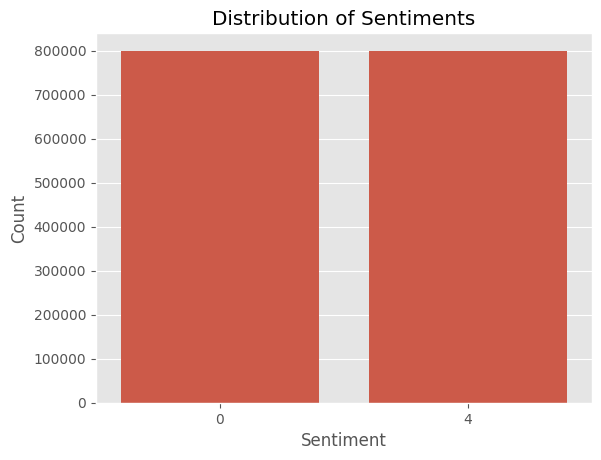

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and column label is the target variable
sns.countplot(x=data['label'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##2.2. Generate a Word Cloud

Common Words and Themes: A word cloud will visually emphasize the most common words in your dataset. Frequent words that are not stop words can give you insight into the common themes or topics in your text data. If certain words are overly dominant, it may indicate common phrases or topics specific to your dataset's context.

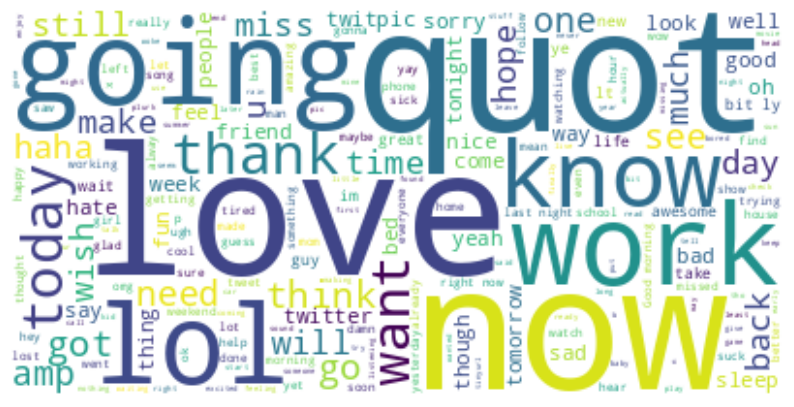

In [ ]:
from wordcloud import WordCloud

# Combine all text data into a single string
text = " ".join(review for review in data['text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##2.3. Check for missing values

Handling Missing Data: If certain columns, especially the text data or target variable, have missing values, you'll need to decide how to handle them. Common strategies include removing rows with missing values or imputing them based on the data distribution. For text data, missing values can sometimes be replaced with a placeholder text like "missing."

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

label        0
tweet_id     0
timestamp    0
query        0
user_id      0
text         0
dtype: int64


##2.4. Visualize Text Length Distribution

Insights from Text Length:
- Mean and Median: These measures give you an idea of the average length of text in your dataset. A large difference between the mean and median may indicate outliers or a skewed distribution.
- Min and Max: The minimum and maximum lengths can highlight if there are any texts that are unusually short or long, which could be outliers or errors.
- Standard Deviation: A high standard deviation indicates a wide range of text lengths, while a low standard deviation suggests that most texts are of similar length.

In [ ]:
# Calculate text length for each tweet
data['text_length'] = data.iloc[:, 5].apply(len)
text_length_stats = data['text_length'].describe()
print(text_length_stats)

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


##2.5. EDA Insights

1. Sentiment Distribution:
  - The distribution of sentiments is balanced with two distinct classes, typically indicating positive and negative sentiments.
  - Each class has roughly the same number of entries, suggesting that the dataset is well-suited for training classification models without the need for sampling techniques to address class imbalance.

2. Missing Values:
  - There are no missing values in any of the columns, which means there is no need for imputation or removal of missing data, and the dataset is clean in this respect.

3. Word Cloud:
  - The word cloud suggests a mix of positive and negative words, with positive words like "love," "thank," and "good" appearing prominently, as well as negative words such as "miss" and "hate."
  - Common terms related to social media interactions like "twitter," "twitpic," and "facebook" are also visible, which is expected given the context of the data.
  - Words related to daily life and personal experiences, such as "work," "going," "today," "back," and "time," indicate the personal nature of the text content.

4. Text Length Statistics:
  - The average length of a text entry is around 74 characters, with a standard deviation of about 36 characters, suggesting moderate variance in text length.
  - The minimum text length is very short at only 6 characters, and the maximum length is 374 characters, which is close to the historical 280-character limit of Twitter, suggesting that the text data is sourced from a platform with a character limit.
  - The 25th percentile is at 44 characters, the median (50th percentile) is at 69 characters, and the 75th percentile is at 104 characters, indicating a right-skewed distribution where most texts are shorter rather than longer.

#3. Data Pre-processing

Data preprocessing involves cleaning and preparing the text data for modeling. Here's what we'll do for the data preprocessing step:

- Remove User Mentions and Hashtags: User mentions (e.g., "@username") and hashtags (e.g., "#example") are common in social media data but might not contribute significantly to the analysis.
- Replace Emojis: Emojis can convey sentiments or emotions, but they can be challenging for machine learning models to interpret directly.
- Replace Chatwords: Chatwords or internet slang (e.g., "lol", "brb") may not be recognized by standard language processing tools.
- Remove Punctuation: Punctuation marks such as periods, commas, and exclamation points may not carry significant meaning for some tasks and can be removed from the text using string manipulation functions or regular expressions.
- Remove Stopwords: Stopwords are common words like "the", "is", "and", etc., that occur frequently in text but often do not contribute much to the overall meaning.
- Remove URL: URLs often appear in text data but may not be relevant to the analysis.
-	Lemmatization: Reduce words to their root form. Lemmatization is typically more useful as it converts words to their meaningful base form.
-	Vectorization: Convert text to a numerical format that machine learning models can understand using TF-IDF vectorization.
-	Split the Data: Divide the dataset into training and testing.

In [ ]:
# Import all necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Pre-defined replacements dictionaries
# Define our emojis dictionary
emojis_dict = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
# Define our chat words dictionary
chat_words_dict = {"BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"}

In [ ]:
# Initialize stopwords and lemmatizer
stop_words_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Cleaning functions
# Remove user mentions and hashtags using regular expression
def remove_user_hashtag(text):
    return re.sub(r'@[^ ]+|#[^ ]+', '', text)

# Replace emojis in the text with their corresponding words based on the provided dictionary of emojis
def replace_emojis(text, emojis):
    for emoji, word in emojis.items():
        text = text.replace(emoji, " " + word)
    return text

# Replace commonly used chat words based on the provided dictionary of chat_words and using regular expression
def replace_chat_words(text, chat_words):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in chat_words.keys()) + r')\b')
    return pattern.sub(lambda x: chat_words[x.group()], text)

# Remove punctuation marks using regular expression
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Remove stopwords, improving text analysis by eliminating common words that carry little meaning
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words_set)

# Apply lemmatization to normalize words for better text analysis and understanding
def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

In [ ]:
# Apply all cleaning operations
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(remove_user_hashtag)
data['text'] = data['text'].apply(replace_emojis, emojis=emojis_dict)
data['text'] = data['text'].apply(replace_chat_words, chat_words=chat_words_dict)
data['text'] = data['text'].apply(remove_punctuation)
data['text'] = data['text'].apply(remove_stopwords)
data['text'] = data['text'].apply(lemmatize_text)

In [ ]:
# Apply regular expression to remove URLs
data['text'] = data['text'].apply(lambda t: re.sub("https\S+www\S+https\s+|http\S+", '', t, flags=re.MULTILINE))

In [ ]:
# Vectorize the cleaned text using TF-IDF with range of unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
# Fit and transform the text data from the 'text' column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

In [ ]:
# Display the first 25 rows of the 'data' DataFrame
data.head(25)

,label,tweet_id,timestamp,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats bummer shoulda got david carr thir...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many time ball managed save 50 rest go b...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time see yes rain bit bit lol im fine...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope didnt
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que muera


In [ ]:
# Import the train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Transform the training and testing data using TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now X_train_tfidf and y_train are ready for training a model
# X_test_tfidf and y_test are ready for evaluating the model

In [ ]:
# Print the training set (X_train)
print(X_train)

1374558    ya quotid like palm pre touchstone charger rea...
1389115            felt earthquake afternoon seems epicenter
1137831                              ruffle shirt like likey
790714     pretty bad night crappy morningfml buttface di...
1117911                                      yeah clear view
                                 ...                        
259178           song middle change doesnt want born arghhhh
1414414                                            good luck
131932                                  rather average 32370
671155     pickin waitin 2 hurry upi odeeee missed dem ta...
121958           home studying math wooot im going fail shit
Name: text, Length: 1280000, dtype: object


In [ ]:
# Print the TF-IDF transformed training set (X_train)
print(X_train_tfidf)

  (0, 7889)	0.32759188479929857
  (0, 6422)	0.3881024484093551
  (0, 6977)	0.23219669623753672
  (0, 817)	0.2983772470114568
  (0, 3407)	0.1580710558788188
  (0, 7886)	0.23792021565974972
  (0, 9897)	0.22032446174285752
  (0, 1369)	0.35888014944935853
  (0, 6757)	0.354414612666464
  (0, 6421)	0.35630263164197423
  (0, 5045)	0.1629924406244058
  (0, 9837)	0.2470984070163691
  (1, 7488)	0.43581051660455133
  (1, 264)	0.4503070821100366
  (1, 2376)	0.6076059840506352
  (1, 2759)	0.4879627993651548
  (2, 5120)	0.7614867304087967
  (2, 7575)	0.5723020639477514
  (2, 5045)	0.3043161300563355
  (3, 9720)	0.2757552057768895
  (3, 3311)	0.27027100109251867
  (3, 1678)	0.2884690496313551
  (3, 2078)	0.35138251333320425
  (3, 706)	0.3735859965788796
  (3, 6779)	0.35844186297480496
  :	:
  (1279995, 7819)	0.31507560516421473
  (1279995, 2167)	0.312677561648564
  (1279995, 9309)	0.2438710963866264
  (1279996, 3439)	0.6774704164303754
  (1279996, 5380)	0.6225077144011072
  (1279996, 3407)	0.39181370

In [ ]:
# Print the TF-IDF transformed testing set (X_train)
print(X_test_tfidf)

  (0, 6248)	0.39157176388928117
  (0, 4079)	0.6834473842592044
  (0, 4054)	0.3356907022110344
  (0, 285)	0.516607180673044
  (1, 8997)	0.4755417639171685
  (1, 1647)	0.4904283171726418
  (1, 498)	0.730301373739471
  (2, 9527)	0.2708286181491824
  (2, 8671)	0.14844818319071082
  (2, 7721)	0.3247175171659523
  (2, 6029)	0.26305831815570174
  (2, 6019)	0.19090953103704622
  (2, 5045)	0.14102664524412695
  (2, 4790)	0.15460152338848943
  (2, 4761)	0.32031702735679873
  (2, 4240)	0.3444685605898666
  (2, 4235)	0.17253097028228664
  (2, 3755)	0.25045405921610386
  (2, 3686)	0.34842518073749756
  (2, 3682)	0.18951942473126865
  (2, 2659)	0.2206786185152004
  (2, 2287)	0.2897145212969884
  (2, 1193)	0.2145465517628846
  (3, 9654)	0.2569382393347954
  (3, 8159)	0.29430901053404335
  :	:
  (319995, 1290)	0.7047842902355761
  (319996, 9448)	0.27743538836210824
  (319996, 7586)	0.3972063664346306
  (319996, 6567)	0.5101439466307142
  (319996, 6566)	0.3439417673595507
  (319996, 1165)	0.52249824726

#4. Model Building

- Logistic Regression: It's a good starting point for text classification tasks.
- Naive Bayes: Often performs well in text classification due to its assumption of independence among features.
- Support Vector Machine (SVM): Can capture complex relationships between features.
- Random Forest: An ensemble method that can capture non-linear patterns.
- Stochastic Gradient Descent Classifier (SGDC) with Logistic Regression: SGDC is an optimization algorithm used to train logistic regression models.
- Artificial Neural Network (ANN): A versatile model inspired by the structure and functioning of the human brain.

For each model, we'll:

- Instantiate the model.
- Train it on the training set.
- Predict sentiments on the test set.

We'll use the preprocessed and vectorized data X_train_tfidf, X_test_tfidf, y_train, and y_test you have from the previous section.

In [ ]:
# Import the selected machine learning models for the project, and evaluation metrics like accuracy score and classification report.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

##4.1. Logistic Regression

In [ ]:
# Logistic Regression
# Instantiate the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_tfidf, y_train)

# Predict on the test set
logreg_pred = logreg.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))

# Detailed classification report
print(classification_report(y_test, logreg_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.784809375
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           4       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000



##4.2. Naive Bayes

In [ ]:
# Naive Bayes
# Instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(X_train_tfidf, y_train)

# Predict on the test set
nb_pred = nb.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

# Detailed classification report
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.76741875
              precision    recall  f1-score   support

           0       0.76      0.77      0.77    159494
           4       0.77      0.76      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



##4.3. Linear Support Vector Machine

In [ ]:
# Linear Support Vector Machine
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("LinearSVC Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

LinearSVC Accuracy: 0.7838
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           4       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



##4.4. Random Forest

In [ ]:
rf_model = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("RandomForest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

RandomForest Accuracy: 0.707575
              precision    recall  f1-score   support

           0       0.77      0.60      0.67    159494
           4       0.67      0.82      0.74    160506

    accuracy                           0.71    320000
   macro avg       0.72      0.71      0.70    320000
weighted avg       0.72      0.71      0.70    320000



##4.5 SGD Classifier with logistic regression setting

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Configure the SGDClassifier for Logistic Regression
clf = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)

# Train the model
clf.fit(X_train_tfidf, y_train)

# Predict on the test set
sgdc_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, sgdc_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, sgdc_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 76.46%
              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           4       0.75      0.79      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.76      0.76    320000



##4.6. ANN

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Adjusting the model to potentially train faster
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),  # Using a single hidden layer with fewer neurons
    max_iter=50,  # Reduce the number of iterations
    activation='relu',
    solver='adam',  # Consider trying 'sgd' with a well-chosen learning rate for potentially faster training
    batch_size=128,  # Increased batch size for faster epoch processing
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=5,  # Number of iterations with no improvement to wait before stopping the training
    random_state=42,
    verbose=True
)

In [ ]:
# Train the model
mlp.fit(X_train_tfidf, y_train)

Iteration 1, loss = 0.46775585
Validation score: 0.783750
Iteration 2, loss = 0.45060487
Validation score: 0.786320
Iteration 3, loss = 0.44536639
Validation score: 0.787234
Iteration 4, loss = 0.44044982
Validation score: 0.788258
Iteration 5, loss = 0.43448890
Validation score: 0.788328
Iteration 6, loss = 0.42776245
Validation score: 0.788555
Iteration 7, loss = 0.42040834
Validation score: 0.788516
Iteration 8, loss = 0.41216667
Validation score: 0.787297
Iteration 9, loss = 0.40355424
Validation score: 0.784906
Iteration 10, loss = 0.39425909
Validation score: 0.784219
Iteration 11, loss = 0.38389309
Validation score: 0.781680
Iteration 12, loss = 0.37404325
Validation score: 0.779484
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(50,),
              max_iter=50, n_iter_no_change=5, random_state=42, verbose=True)

In [ ]:
# Evaluate the model on the test set
y_pred = mlp.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.505371875
              precision    recall  f1-score   support

           0       0.50      0.45      0.48    159494
           4       0.51      0.56      0.53    160506

    accuracy                           0.51    320000
   macro avg       0.51      0.51      0.50    320000
weighted avg       0.51      0.51      0.50    320000



##4.7. VADER Lexicon

In [ ]:
# Download the VADER lexicon from NLTK
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Import the SentimentIntensityAnalyzer class from NLTK's VADER module
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
'''
Perform sentiment analysis using VADER lexicon on text data stored in a DataFrame.

    Parameters:
        data (DataFrame): DataFrame containing the text data.
        text_column (str): Name of the column containing the text data. Default is 'text'.
        threshold (float): Threshold value used to determine final sentiment. Default is 0.1.
        verbose (bool): Whether to display detailed sentiment statistics. Default is False.
'''
def analyze_sentiment_vader_lexicon(data, text_column='text', threshold=0.1, verbose=False):

    # Analyze sentiment for each text
    sentiments = []
    for text in data[text_column]:
        scores = analyzer.polarity_scores(text)  # Assuming 'analyzer' is already defined outside this function
        agg_score = scores['compound']
        final_sentiment = 'positive' if agg_score >= threshold else 'negative'
        sentiments.append(final_sentiment)

    # Add 'sentiment' column to DataFrame
    data['sentiment'] = sentiments

    # Display detailed sentiment statistics if verbose is True
    if verbose:
        sentiment_stats = []
        for text in data[text_column]:
            scores = analyzer.polarity_scores(text)  # Assuming 'analyzer' is already defined outside this function
            positive = round(scores['pos'] * 100, 2)
            negative = round(scores['neg'] * 100, 2)
            sentiment_stats.append((positive, negative))

        sentiment_stats_df = pd.DataFrame(sentiment_stats, columns=['Positive', 'Negative'])
        data = pd.concat([data, sentiment_stats_df], axis=1)

    return data

In [ ]:
# Predict sentiment for each text in the DataFrame using VADER lexicon with custom threshold
predicted_sentiments = analyze_sentiment_vader_lexicon(data, text_column='text', threshold=0.4, verbose=False)

In [ ]:
#Import the model evaluation utilities module
import model_evaluation_utils as meu

In [ ]:
#Extract sentiment labels from the dataframe
test_sentiments = data['label']

# Convert sentiment labels to match the format (0 for negative, 4 for positive)
predicted_sentiments['predicted_label'] = predicted_sentiments['sentiment'].map({'negative': 0, 'positive': 4})

# Display model performance metrics
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments['predicted_label'], classes=[0, 4])

Model Performance metrics:
------------------------------
Accuracy: 0.6439
Precision: 0.6576
Recall: 0.6439
F1 Score: 0.6361

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.61      0.79      0.69    800000
           4       0.70      0.50      0.58    800000

    accuracy                           0.64   1600000
   macro avg       0.66      0.64      0.64   1600000
weighted avg       0.66      0.64      0.64   1600000


Prediction Confusion Matrix:
------------------------------


TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

# SentiWordNet

In [ ]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import pandas as pd
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [ ]:
def analyze_sentiment(sentence):
    sentiment = 0.0
    lemmatizer = WordNetLemmatizer()
    token = nltk.word_tokenize(sentence)
    after_tagging = nltk.pos_tag(token)
    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()

    return 'positive' if sentiment >= 0 else 'negative'

In [ ]:
# Load and preprocess your dataset
data['predicted_sentiment'] = data['text'].apply(analyze_sentiment)

# Convert sentiment labels to match the format (0 for negative, 4 for positive)
data['predicted_label'] = data['predicted_sentiment'].map({'negative': 0, 'positive': 4})

# Extract sentiment labels from the dataframe
test_sentiments = data['label']

In [ ]:
# Converts PennTreebank part-of-speech (POS) tags to corresponding WordNet POS tags.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def display_model_performance_metrics(true_labels, predicted_labels, classes=[0, 4]):
    print("Accuracy:", accuracy_score(true_labels, predicted_labels))
    print("Precision:", precision_score(true_labels, predicted_labels, average='weighted', labels=classes))
    print("Recall:", recall_score(true_labels, predicted_labels, average='weighted', labels=classes))
    print("F1 Score:", f1_score(true_labels, predicted_labels, average='weighted', labels=classes))

# Assuming you've already analyzed the sentiment and stored it in the 'predicted_label' column
test_sentiments = data['label']
predicted_sentiments = data['predicted_label']

# Display model performance metrics
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments)

In [ ]:
# Convert sentiment labels to match the format (0 for negative, 4 for positive)
data['predicted_label'] = data['predicted_sentiment'].map({'negative': 0, 'positive': 4})

# Extract sentiment labels from the dataframe
true_labels = data['label']
predicted_labels = data['predicted_label']

# Print classification report
print(classification_report(true_labels, predicted_labels))

#5. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to hold the performance metrics
model_performance = {}

# List of model predictions for iteration
predictions = [
    ('Logistic Regression', logreg_pred),
    ('Naive Bayes', nb_pred),
    ('LinearSVC', svm_pred),
    ('Random Forest', rf_pred),
    ('SGDC Classifier', sgdc_pred),
    ('Artificial Neural Network', y_pred)
    ]

# Calculate metrics for each model
for model_name, model_pred in predictions:
    model_performance[model_name] = {
        'Accuracy': accuracy_score(y_test, model_pred),
        'Precision': precision_score(y_test, model_pred, average='weighted'),
        'Recall': recall_score(y_test, model_pred, average='weighted'),
        'F1 Score': f1_score(y_test, model_pred, average='weighted')
    }

# Convert the dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T
performance_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.784809,0.785343,0.784809,0.784688
Naive Bayes,0.767419,0.767464,0.767419,0.767415
LinearSVC,0.783800,0.784598,0.783800,0.783623
Random Forest,0.707575,0.718027,0.707575,0.703857
SGDC Classifier,0.764572,0.765124,0.764572,0.764424
Artificial Neural Network,0.788913,0.788917,0.788913,0.788909


#6. Model Optimization

Model optimization involves selecting the right parameters for your models to improve their performance. This is usually done through a process known as hyperparameter tuning, where we can search through a predefined space of hyperparameters to find the combination that performs best on our validation set. Common strategies include Grid Search and Random Search. Here's how we could approach model optimization:

- For Logistic Regression:
  - We might optimize the regularization strength (C) and the type of penalty (l1 or l2).

- For Linear SVM:
  - We can tune the regularization parameter (C) and the loss function (hinge or squared_hinge).


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with built-in Cross-Validation to find the best 'C'
log_reg_cv = LogisticRegressionCV(
    Cs=10,  # 10 values for 'C' to try
    cv=3,  # Fewer folds
    penalty='l2',  # Assuming l2 penalty
    solver='saga',  # Efficient solver for large datasets
    random_state=42,
    max_iter=1000,  # May need to increase if convergence warnings arise
    n_jobs=-1
)

# Fit the model
log_reg_cv.fit(X_train_tfidf, y_train)

# Predictions and report
log_reg_cv_pred = log_reg_cv.predict(X_test_tfidf)
log_reg_cv_report = classification_report(y_test, log_reg_cv_pred)

# Print the best 'C' parameter and the report
print("Best 'C' Parameter:", log_reg_cv.C_)
print(log_reg_cv_report)


Best 'C' Parameter: [0.35938137]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           4       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import classification_report, accuracy_score

# Define your feature matrices and target vectors for both training and testing sets
X_train = X_train_tfidf
y_train = y_train
X_test = X_test_tfidf
y_test = y_test

# Instantiate the LinearSVC model
linear_svc = LinearSVC(dual=False, max_iter=10000, random_state=42)

# Define the hyperparameters search space
param_distributions = {'C': loguniform(1e-4, 1e2)}

# Instantiate the RandomizedSearchCV object
random_search_svc = RandomizedSearchCV(
    linear_svc,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the RandomizedSearchCV object to the training data
random_search_svc.fit(X_train, y_train)

# Get the best LinearSVC model
best_linear_svc = random_search_svc.best_estimator_

# Retrain the model on the entire training dataset using the best-found hyperparameters
best_linear_svc.fit(X_train, y_train)

# Predict on the test data with the retrained model
y_pred = best_linear_svc.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Optimized Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)

# Print the best parameters
print("Best Parameters Found by Randomized Search:", random_search_svc.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimized Model Accuracy: 0.7839
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           4       0.77      0.81      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Best Parameters Found by Randomized Search: {'C': 0.39079671568228835}


Extra trial- Optimization of Logistic Regression (Taking more time to run):

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Explore a wide range of regularization strengths
    'penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'solver': ['liblinear']  # Solver compatible with L1 penalty
}

# Setup GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# Predict on the test set with the best parameters
logreg_pred = grid_search.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.78463359375
Logistic Regression Accuracy: 0.7850625
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159494
           4       0.77      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.79      0.78    320000



# 7. Sentiment Predictions

As ANN model was having the highest accuracy, we have selected ANN model as our base and based on that we have executed the sentiment predictions.

In [ ]:
# Import the required modules
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# Load the trained model
joblib.dump(mlp, 'ann_model_pipeline.pkl')

['ann_model_pipeline.pkl']

In [ ]:
## Based on the word can we predict the sentiment to be positive or negative

# Assuming 'text' contains the preprocessed text
def predict_sentiment(text):
  # Vectorize the input text using the same TfidfVectorizer used for training
  tfidf_vector = tfidf_vectorizer.transform([text])

  # Predict the sentiment using the trained model
  prediction = mlp.predict(tfidf_vector)

  # Map the prediction to a sentiment label
  if prediction == 0:
    return 'Negative'
  else:
    return 'Positive'

In [ ]:
# Example 1 usage:
text = "You have completed your homework"
sentiment = predict_sentiment(text)
print("Sentiment:", sentiment)

In [ ]:
# Example 2 usage:
text = "There is traffic outside"
sentiment = predict_sentiment(text)
print("Sentiment:", sentiment)

Sentiment: Negative
